In [21]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [22]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.layers import SimpleRNN, Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_features = 10000  # кількість слів для розгляду як індикаторів
maxlen = 500  # обрізаємо тексти після цього кількості слів відбувшихся в кожному документі

# Завантажуємо набір даних
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)

# Тепер ми падаємо наші дані
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

In [23]:
def create_model(layer_type, *args, **kwargs):
    model = Sequential()
    model.add(Embedding(max_features, 32))
    if layer_type == 'Bidirectional':
        layer = LSTM(*args, **kwargs)
        model.add(Bidirectional(layer))
    else:
        model.add(layer_type(*args, **kwargs))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])
    return model

In [24]:
def plot_metrics(history):
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set()

    # "History" object keeps the history of loss and metric values in history.history:
    history_dict = history.history

    # Plot Training and validation loss:

    loss_values = history_dict['loss']  # Loss values for training
    val_loss_values = history_dict['val_loss'] # Loss values for validation
    epochs = range(1, len(loss_values) + 1) # X-axis values

    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.plot(epochs, loss_values, 'g', label='Training loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Training and validation accuracy:

    acc_values = history_dict['acc']  # accuracy values for training
    val_acc_values = history_dict['val_acc'] # accuracy values for validation

    plt.subplot(1,2,2)
    plt.plot(epochs, acc_values, 'g', label='Training accuracy')
    plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [25]:
models = [(SimpleRNN, 32),
          (LSTM, 32),
          ('Bidirectional', 32)]

Epoch 1/50
157/157 [==============================] - 9s 54ms/step - loss: 0.6013 - acc: 0.6643 - val_loss: 0.4335 - val_acc: 0.8104
Epoch 2/50
157/157 [==============================] - 8s 54ms/step - loss: 0.3707 - acc: 0.8480 - val_loss: 0.3867 - val_acc: 0.8322
Epoch 3/50
157/157 [==============================] - 8s 52ms/step - loss: 0.2903 - acc: 0.8835 - val_loss: 0.5494 - val_acc: 0.8048
Epoch 4/50
157/157 [==============================] - 8s 53ms/step - loss: 0.2233 - acc: 0.9160 - val_loss: 0.3408 - val_acc: 0.8574
Epoch 5/50
157/157 [==============================] - 8s 52ms/step - loss: 0.1874 - acc: 0.9298 - val_loss: 0.4526 - val_acc: 0.8396
Epoch 6/50
157/157 [==============================] - 8s 53ms/step - loss: 0.1300 - acc: 0.9554 - val_loss: 0.4175 - val_acc: 0.8566
Epoch 7/50
157/157 [==============================] - 8s 53ms/step - loss: 0.0897 - acc: 0.9690 - val_loss: 0.5207 - val_acc: 0.8108
Epoch 8/50
157/157 [==============================] - 8s 52ms/step - 

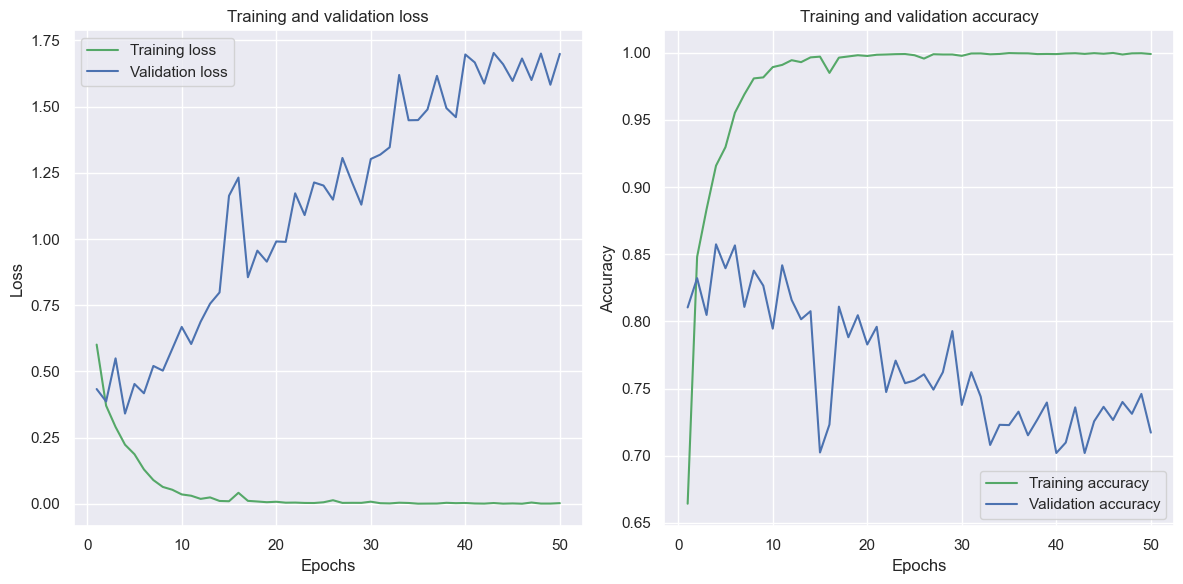

Epoch 1/50
157/157 [==============================] - 22s 135ms/step - loss: 0.5104 - acc: 0.7624 - val_loss: 0.4984 - val_acc: 0.7732
Epoch 2/50
157/157 [==============================] - 22s 143ms/step - loss: 0.2934 - acc: 0.8848 - val_loss: 0.5441 - val_acc: 0.8226
Epoch 3/50
157/157 [==============================] - 23s 145ms/step - loss: 0.2355 - acc: 0.9125 - val_loss: 0.2976 - val_acc: 0.8838
Epoch 4/50
157/157 [==============================] - 23s 144ms/step - loss: 0.2002 - acc: 0.9240 - val_loss: 0.3351 - val_acc: 0.8826
Epoch 5/50
157/157 [==============================] - 22s 140ms/step - loss: 0.1736 - acc: 0.9377 - val_loss: 0.3564 - val_acc: 0.8878
Epoch 6/50
157/157 [==============================] - 21s 131ms/step - loss: 0.1594 - acc: 0.9445 - val_loss: 0.3170 - val_acc: 0.8790
Epoch 7/50
157/157 [==============================] - 20s 130ms/step - loss: 0.1376 - acc: 0.9516 - val_loss: 0.4944 - val_acc: 0.8564
Epoch 8/50
157/157 [==============================] - 2

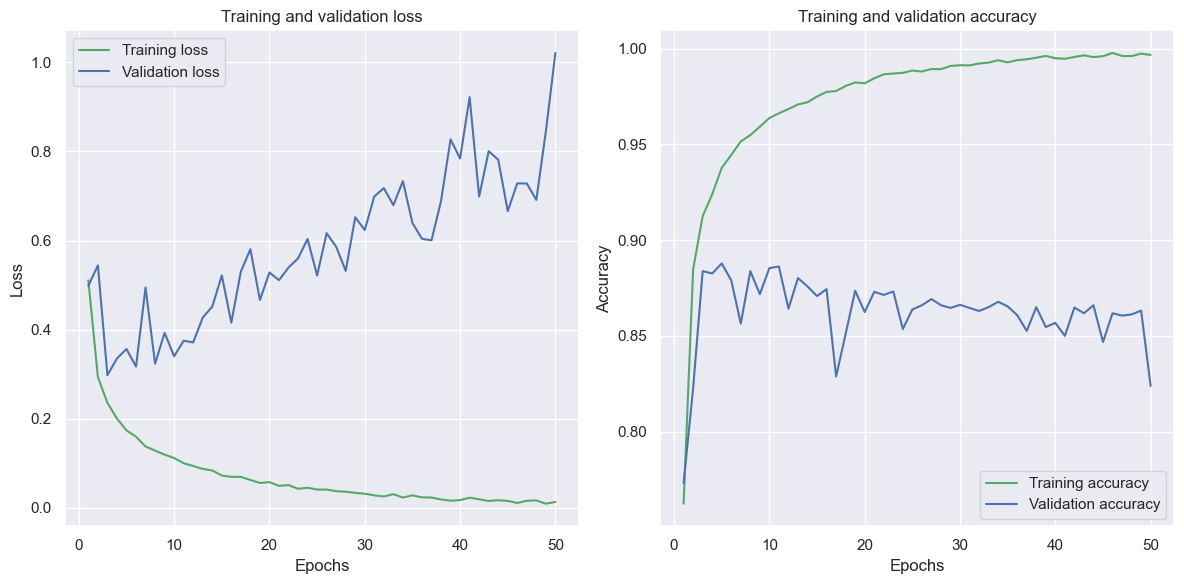

Epoch 1/50
157/157 [==============================] - 25s 151ms/step - loss: 0.5376 - acc: 0.7422 - val_loss: 0.4257 - val_acc: 0.8178
Epoch 2/50
157/157 [==============================] - 24s 154ms/step - loss: 0.3143 - acc: 0.8788 - val_loss: 0.3989 - val_acc: 0.8498
Epoch 3/50
157/157 [==============================] - 24s 154ms/step - loss: 0.2499 - acc: 0.9056 - val_loss: 0.3060 - val_acc: 0.8842
Epoch 4/50
157/157 [==============================] - 25s 156ms/step - loss: 0.2070 - acc: 0.9247 - val_loss: 0.2865 - val_acc: 0.8848
Epoch 5/50
157/157 [==============================] - 24s 153ms/step - loss: 0.1849 - acc: 0.9334 - val_loss: 0.2979 - val_acc: 0.8892
Epoch 6/50
157/157 [==============================] - 25s 156ms/step - loss: 0.1611 - acc: 0.9423 - val_loss: 0.3004 - val_acc: 0.8862
Epoch 7/50
157/157 [==============================] - 24s 156ms/step - loss: 0.1440 - acc: 0.9503 - val_loss: 0.3193 - val_acc: 0.8620
Epoch 8/50
157/157 [==============================] - 2

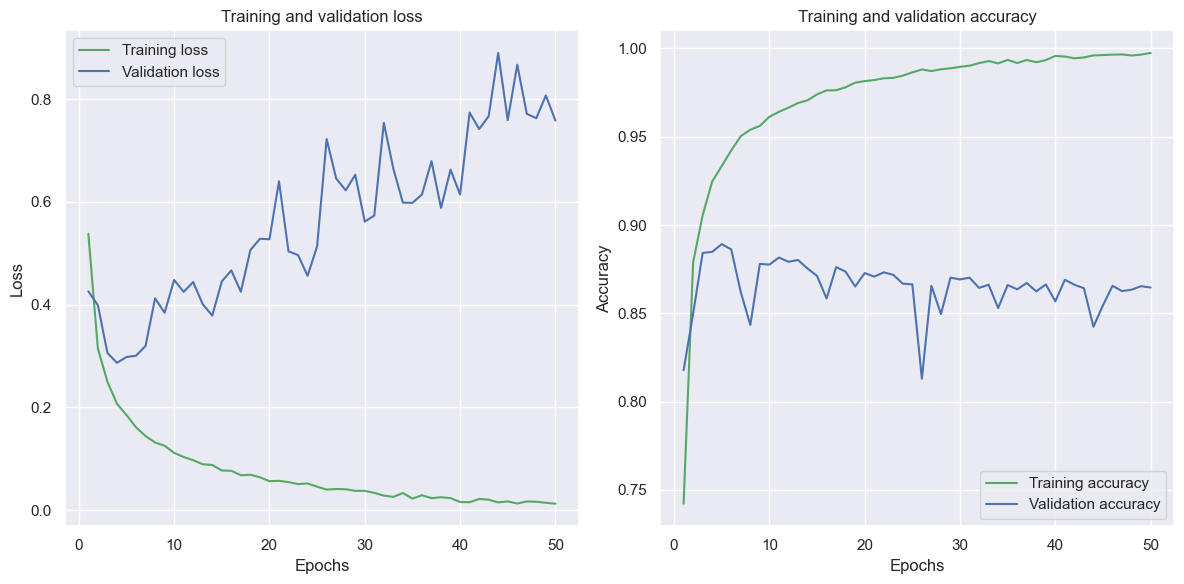

Model: <class 'keras.layers.rnn.simple_rnn.SimpleRNN'>
 - Accuracy: 0.9991000294685364
 - Validation Accuracy: 0.717199981212616
-------------------------------------------------------
Model: <class 'keras.layers.rnn.lstm.LSTM'>
 - Accuracy: 0.9966999888420105
 - Validation Accuracy: 0.8238000273704529
-------------------------------------------------------
Model: Bidirectional
 - Accuracy: 0.9974499940872192
 - Validation Accuracy: 0.8646000027656555
-------------------------------------------------------


In [26]:
history_dict = {}

for layer, units in models:
    model = create_model(layer, units)
    history = model.fit(X_train, y_train,
                        epochs=50,
                        batch_size=128,
                        validation_split=0.2)
    history_dict[layer] = history.history
    plot_metrics(history)

# Сравнить историю обучения каждой модели
for model_name, model_history in history_dict.items():
    print(f'Model: {model_name}')
    print(f' - Accuracy: {model_history["acc"][-1]}')
    print(f' - Validation Accuracy: {model_history["val_acc"][-1]}')
    print('-------------------------------------------------------')

### Conclusion

Разные архитектуры подходят для разных типов задач, и некоторые могут работать лучше, чем другие, на конкретных данных. Обычно LSTM и двунаправленные LSTM обеспечивают хорошую производительность на большинстве задач анализа текста.